# importing packages 

In [200]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import requests 
import os
import seaborn as sns
import json 
import re
import tweepy
import time
from tweepy import OAuthHandler
from timeit import default_timer as timer




# Gather provided dataset

In [201]:
twitter_df = pd.read_csv('twitter-archive-enhanced.csv')
twitter_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [202]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

# Gather image data through URL:

**Imgage prediction url**

In [203]:
url = (' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

r = requests.get(url)
open('image_predictions.tsv', 'wb').write(r.content)

335079

In [204]:
image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')

In [205]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [206]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


# Gather tweeter data through tweeter API

In [207]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'jtnF33XUKc2ZAtBDCkCpM9AGU'
consumer_secret = 'ShZ9SznWxkmuoRhpisQJyBB9WddnCfSki5bYh8QLvRxRrYnTJA'
access_token = '1357210499562176514-79Tt0vKgc7soGmWuKm47hUjMASQbHe'
access_secret = 'B0yZrnxjMLYtDj6danTWANoeru3mHYemHPMboH7qJ635h'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


tweet_ids = twitter_df.tweet_id.values
len(tweet_ids)


2356

In [208]:
# list of tweet ids from enhanced data set
df_tweet_ids = twitter_df['tweet_id']

In [209]:
# creating a list for tweets with exceptions/errors 
tweets_error_list = []

# List of tweets
df_tweets = []

# start time of execution
start = time.time()

# For loop which will add each available tweet json to df_list
for tweet_id in df_tweet_ids:
    try:
        tweet = api.get_status(tweet_id, tweet_mode= 'extended')._json 
        
        favorites = tweet['favorite_count'] # number of favorites for the tweet
        retweets = tweet['retweet_count'] # number of retweets
        user_followers = tweet['user']['followers_count'] # number of followers of the user who tweeted
        user_favourites = tweet['user']['favourites_count'] # number of favourites for the user who tweeted
        date_time = tweet['created_at'] # the timestamp i.e. date and time of creation of the tweet
        
        df_tweets.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'user_followers': int(user_followers),
                        'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
    except Exception as e:
        print(str(tweet_id)+ " _ " + str(e))
        tweets_error_list.append(tweet_id)
        
# end time for excution
end = time.time()

#printing time for execution
print("Total time taken for execution", end - start)

In [210]:
# total tweets received from api
print("The lengh of the result", len(df_tweets))

# The tweet_id of the errors received from api
print("The lengh of the errors", len(tweets_error_list))

The lengh of the result 2331
The lengh of the errors 25


**store gathered data into json file**

In [211]:
# creating DataFrames
df_tweets_json = pd.DataFrame(df_tweets, columns = ['tweet_id', 'favorites', 'retweets',
                                               'user_followers', 'user_favourites', 'date_time'])
# saving the dataFrame to file
df_tweets_json.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [212]:

# Read the saved tweet_json.txt file into a dataframe
df_api_data = pd.read_csv('tweet_json.txt', encoding = 'utf-8')

In [213]:
df_api_data.head()

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,35084,7397,8957997,146001,2017-08-01 16:23:56+00:00
1,892177421306343426,30374,5511,8957997,146001,2017-08-01 00:17:27+00:00
2,891815181378084864,22840,3637,8957997,146001,2017-07-31 00:18:03+00:00
3,891689557279858688,38331,7561,8957997,146001,2017-07-30 15:58:51+00:00
4,891327558926688256,36603,8153,8957997,146001,2017-07-29 16:00:24+00:00


In [214]:
df_api_data.tail()

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
2326,666049248165822465,94,38,8958006,146001,2015-11-16 00:24:50+00:00
2327,666044226329800704,260,122,8958006,146001,2015-11-16 00:04:52+00:00
2328,666033412701032449,107,39,8958006,146001,2015-11-15 23:21:54+00:00
2329,666029285002620928,117,41,8958006,146001,2015-11-15 23:05:30+00:00
2330,666020888022790149,2349,445,8958006,146001,2015-11-15 22:32:08+00:00


In [215]:
df_api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2331 non-null   int64 
 1   favorites        2331 non-null   int64 
 2   retweets         2331 non-null   int64 
 3   user_followers   2331 non-null   int64 
 4   user_favourites  2331 non-null   int64 
 5   date_time        2331 non-null   object
dtypes: int64(5), object(1)
memory usage: 109.4+ KB


**The 3 dataframes are:**

**twitter_df: contains the data from the given csv file.**

**image_predictions: contains data read (by using requests) from tsv file hosted on server.**

**df_api_data : contains data obtained from twitter handle by using tweepy library.**

# Assessing data:

**1) twitter_df**

In [216]:
twitter_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [217]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [218]:
twitter_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


**2) image_predictions**

In [219]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [220]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [221]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


**3) df_api_data**

In [222]:
df_api_data.head()

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,35084,7397,8957997,146001,2017-08-01 16:23:56+00:00
1,892177421306343426,30374,5511,8957997,146001,2017-08-01 00:17:27+00:00
2,891815181378084864,22840,3637,8957997,146001,2017-07-31 00:18:03+00:00
3,891689557279858688,38331,7561,8957997,146001,2017-07-30 15:58:51+00:00
4,891327558926688256,36603,8153,8957997,146001,2017-07-29 16:00:24+00:00


In [223]:
df_api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2331 non-null   int64 
 1   favorites        2331 non-null   int64 
 2   retweets         2331 non-null   int64 
 3   user_followers   2331 non-null   int64 
 4   user_favourites  2331 non-null   int64 
 5   date_time        2331 non-null   object
dtypes: int64(5), object(1)
memory usage: 109.4+ KB


In [224]:
df_api_data.describe()

,tweet_id,favorites,retweets,user_followers,user_favourites
count,2.331000e+03,2331.000000,2331.000000,2.331000e+03,2331.000000
mean,7.419079e+17,7326.680395,2599.401115,8.957996e+06,146000.996568
std,6.823170e+16,11377.323814,4396.946574,4.242031e+01,0.101433
min,6.660209e+17,0.000000,1.000000,8.957576e+06,146000.000000
25%,6.782670e+17,1273.500000,527.500000,8.957996e+06,146001.000000
50%,7.182469e+17,3182.000000,1213.000000,8.958001e+06,146001.000000
75%,7.986692e+17,8956.000000,3013.500000,8.958004e+06,146001.000000
max,8.924206e+17,150863.000000,74632.000000,8.958007e+06,146002.000000


**Checking for duplicate value present in all the datasets.**

In [225]:
sum(twitter_df['tweet_id'].duplicated())

0

In [226]:
sum(image_predictions['tweet_id'].duplicated())

0

In [227]:
df_api_data[df_api_data.duplicated(['user_favourites'], keep=False)]

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,35084,7397,8957997,146001,2017-08-01 16:23:56+00:00
1,892177421306343426,30374,5511,8957997,146001,2017-08-01 00:17:27+00:00
2,891815181378084864,22840,3637,8957997,146001,2017-07-31 00:18:03+00:00
3,891689557279858688,38331,7561,8957997,146001,2017-07-30 15:58:51+00:00
4,891327558926688256,36603,8153,8957997,146001,2017-07-29 16:00:24+00:00
...,...,...,...,...,...,...
2326,666049248165822465,94,38,8958006,146001,2015-11-16 00:24:50+00:00
2327,666044226329800704,260,122,8958006,146001,2015-11-16 00:04:52+00:00
2328,666033412701032449,107,39,8958006,146001,2015-11-15 23:21:54+00:00
2329,666029285002620928,117,41,8958006,146001,2015-11-15 23:05:30+00:00


In [228]:
#shows the missing values in dataset
twitter_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [229]:
#checking the rating values for numerator
twitter_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [230]:
#checking the values for denominator 
twitter_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [231]:
#Checking the dog names
dog_names_list = []
dog_names_list = twitter_df['name'].unique()
dog_names_list.sort()
dog_names_list

array(['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al',
       'Albert', 'Albus', 'Aldrick', 'Alejandro', 'Alexander',
       'Alexanderson', 'Alf', 'Alfie', 'Alfy', 'Alice', 'Amber',
       'Ambrose', 'Amy', 'Amélie', 'Anakin', 'Andru', 'Andy', 'Angel',
       'Anna', 'Anthony', 'Antony', 'Apollo', 'Aqua', 'Archie', 'Arlen',
       'Arlo', 'Arnie', 'Arnold', 'Arya', 'Ash', 'Asher', 'Ashleigh',
       'Aspen', 'Astrid', 'Atlas', 'Atticus', 'Aubie', 'Augie', 'Autumn',
       'Ava', 'Axel', 'Bailey', 'Baloo', 'Balto', 'Banditt', 'Banjo',
       'Barclay', 'Barney', 'Baron', 'Barry', 'Batdog', 'Bauer', 'Baxter',
       'Bayley', 'BeBe', 'Bear', 'Beau', 'Beckham', 'Beebop', 'Beemo',
       'Bell', 'Bella', 'Belle', 'Ben', 'Benedict', 'Benji', 'Benny',
       'Bentley', 'Berb', 'Berkeley', 'Bernie', 'Bert', 'Bertson',
       'Betty', 'Beya', 'Biden', 'Bilbo', 'Billl', 'Billy', 'Binky',
       'Birf', 'Bisquick', 'Blakely', 'Blanket', 'Blipson', 'Blitz',
       'Bloo', 'Bloop',

# Quality issues:



**Quality issues in twitter_df dataframe:**

**1)  in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id , retweeted_status_user_id, retweeted_status_timestamp columns have missing values and does not contain any useful data so remove them.**

**2) Doggo,pupper.floofer and puppo columns has missing values and they are denoted as None instead of NaN.**

**3) Timestamp and retweeted_status_timestamp columns must be datetime instead of object.**

**4) Remove unwanted columns from dataset.**

**5) Dogs name column contains random names.**

**6) denominator contains value=10 for 2333 results so considering 10 for other conditions as well.**



**Quality issues in image_predictions dataframe:**

**1) p1, p2, p3: dog breed names are not all in lowercase.**

**2) p1, p2 and p3 should be categoral datatype.**

**Quality issues in df_api_data dataframe:**

**1) user_favourites value is same for all rows, which seems incorrect.**

**2) date_time should be of datetime datatype instead of object.**



# Tidiness


**1) doggo, floofer, pupper and puppo are different dog types which should be in a same column rather than different.**

**2) retweet_counts and fav_count should be combined twitter_df instead of a separate table of tweet_id.**

# Cleaning

In [232]:
#making copy of all 3 dataframes
twitter_df_clean = twitter_df.copy()
image_predictions_clean = image_predictions.copy()
df_api_data_clean = df_api_data.copy()

**Define**

in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id , retweeted_status_user_id, retweeted_status_timestamp columns have missing values and does not contain any useful data so remove them.**

**Code**

In [233]:
retweeted_cols = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
retweeted_mask = twitter_df_clean.retweeted_status_id.notnull()

twitter_df_clean = twitter_df_clean[~retweeted_mask]
twitter_df_clean_rt_test = twitter_df_clean.copy() # For testing
twitter_df_clean.drop(columns=retweeted_cols, inplace=True)
twitter_df_clean.reset_index(drop=True, inplace=True)

**Test**

In [234]:
twitter_df_clean_rt_test.retweeted_status_id.notnull().sum()

0

In [235]:
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  doggo                  2175 non-null   object 
 11  floofer                2175 non-null   object 
 12  pupper                 2175 non-null   object 
 13  puppo                  2175 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 238.0+ 

**Define**

Dropping columns which have missing data on large numbers and dont required.

**Code**

In [236]:
columns = ['in_reply_to_status_id','in_reply_to_user_id','expanded_urls']
twitter_df_clean.drop(columns,axis=1,inplace=True)

**Test**

In [237]:
twitter_df_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


**Define**

Clean the content of source column, make it more readable.

**Code**

In [238]:
twitter_df_clean['source'] = twitter_df_clean['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

**Test**

In [239]:
twitter_df_clean['source'].value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

**Define** 

Change the datatype of timestamp column to datetime.

**Code**

In [240]:
twitter_df_clean.timestamp = pd.to_datetime(twitter_df_clean.timestamp).dt.tz_localize(None)

**Test**

In [241]:
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2175 non-null   int64         
 1   timestamp           2175 non-null   datetime64[ns]
 2   source              2175 non-null   object        
 3   text                2175 non-null   object        
 4   rating_numerator    2175 non-null   int64         
 5   rating_denominator  2175 non-null   int64         
 6   name                2175 non-null   object        
 7   doggo               2175 non-null   object        
 8   floofer             2175 non-null   object        
 9   pupper              2175 non-null   object        
 10  puppo               2175 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 187.0+ KB


**Define**

Columns contains None instead of NaN for missing values.

**Code**

In [242]:
twitter_df_clean.name = twitter_df_clean.name.replace('None', np.nan)

**Test**

In [243]:
twitter_df_clean.name.loc[twitter_df_clean.name == 'None'].sum()

0

**Define**

denominator contains value=10 for 2333 results so considering 10 for other conditions as well.

**Code**

In [244]:
twitter_df_clean.rating_denominator = 10

**Test**

In [245]:
twitter_df_clean.rating_denominator.value_counts()

10    2175
Name: rating_denominator, dtype: int64

In [246]:
twitter_df_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


**Define**

Make all strings in p1, p2, and p3 lowercase

**Code**

In [247]:
image_predictions_clean['p1'] = image_predictions_clean['p1'].str.lower()
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.lower()
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.lower()

**Test**

In [248]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


**Define**

p1, p2 and p3 should be categoral datatype

**Code**

In [249]:
image_predictions_clean['p1'] = image_predictions_clean['p1'].astype('category')
image_predictions_clean['p2'] = image_predictions_clean['p3'].astype('category')
image_predictions_clean['p3'] = image_predictions_clean['p2'].astype('category')


**Test**

In [250]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   tweet_id  2075 non-null   int64   
 1   jpg_url   2075 non-null   object  
 2   img_num   2075 non-null   int64   
 3   p1        2075 non-null   category
 4   p1_conf   2075 non-null   float64 
 5   p1_dog    2075 non-null   bool    
 6   p2        2075 non-null   category
 7   p2_conf   2075 non-null   float64 
 8   p2_dog    2075 non-null   bool    
 9   p3        2075 non-null   category
 10  p3_conf   2075 non-null   float64 
 11  p3_dog    2075 non-null   bool    
dtypes: bool(3), category(3), float64(3), int64(2), object(1)
memory usage: 175.0+ KB


**Define**

date_time should be of datetime datatype instead of object.

**code**

In [251]:
df_api_data_clean.date_time = pd.to_datetime(df_api_data_clean.date_time).dt.tz_localize(None)

**Test**

In [252]:
df_api_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   tweet_id         2331 non-null   int64         
 1   favorites        2331 non-null   int64         
 2   retweets         2331 non-null   int64         
 3   user_followers   2331 non-null   int64         
 4   user_favourites  2331 non-null   int64         
 5   date_time        2331 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(5)
memory usage: 109.4 KB


**Tidiness**

**Define**

doggo, floofer, pupper and puppo are different dog types which should be in a same column rather than different.

**Code**

In [253]:
df_test = twitter_df_clean.copy()
df_test['test'] = np.where(twitter_df_clean['doggo'] == 'doggo', twitter_df_clean['doggo'],
                              np.where(twitter_df_clean['puppo'] == 'puppo', twitter_df_clean['puppo'],
                              np.where(twitter_df_clean['pupper'] == 'pupper', twitter_df_clean['pupper'],
                              'None'
                              )))
df_test['test'].value_counts()

None      1840
pupper     224
doggo       87
puppo       24
Name: test, dtype: int64

In [254]:
# Create dog stage field
twitter_df_clean['dog_stage'] = twitter_df_clean['doggo'] + twitter_df_clean['puppo'] + twitter_df_clean['pupper']


twitter_df_clean['dog_stage'] = twitter_df_clean['dog_stage'].str.replace('None', '')


twitter_df_clean['dog_stage'] = twitter_df_clean['dog_stage'].str.replace('doggopupper', 'doggo and pupper')

**Test**

In [255]:
# Check dog_stage values
print(twitter_df_clean['dog_stage'].value_counts())

                    1840
pupper               224
doggo                 76
puppo                 24
doggo and pupper      10
doggopuppo             1
Name: dog_stage, dtype: int64


In [256]:
twitter_df_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None,
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None,
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None,
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None,
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None,


**Define**

 retweet_counts and fav_count should be combined twitter_df instead of a separate table of tweet_id

**Code**

In [257]:
twitter_df_clean = pd.merge(left=twitter_df_clean,right=df_api_data_clean, left_on='tweet_id', right_on='tweet_id', how='inner')

In [258]:
twitter_df_clean = twitter_df_clean.merge(image_predictions_clean, on='tweet_id', how='inner')

In [259]:
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1987 non-null   int64         
 1   timestamp           1987 non-null   datetime64[ns]
 2   source              1987 non-null   object        
 3   text                1987 non-null   object        
 4   rating_numerator    1987 non-null   int64         
 5   rating_denominator  1987 non-null   int64         
 6   name                1441 non-null   object        
 7   doggo               1987 non-null   object        
 8   floofer             1987 non-null   object        
 9   pupper              1987 non-null   object        
 10  puppo               1987 non-null   object        
 11  dog_stage           1987 non-null   object        
 12  favorites           1987 non-null   int64         
 13  retweets            1987 non-null   int64       

In [260]:
twitter_df_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,...,1,orange,0.097049,False,banana,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,...,1,chihuahua,0.323581,True,papillon,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,...,1,chihuahua,0.716012,True,kelpie,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,...,1,paper_towel,0.170278,False,spatula,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,...,2,basset,0.555712,True,german_short-haired_pointer,0.225770,True,german_short-haired_pointer,0.175219,True


# Storing the dataframe into a master datafreame.

**Define**

Saving the dataframe into a master dataframe.

**Code**

In [261]:
twitter_df_clean.to_csv('twitter_df_master.csv', index=False)

In [262]:
twitter_df_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,...,1,orange,0.097049,False,banana,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,...,1,chihuahua,0.323581,True,papillon,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,...,1,chihuahua,0.716012,True,kelpie,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,...,1,paper_towel,0.170278,False,spatula,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,...,2,basset,0.555712,True,german_short-haired_pointer,0.225770,True,german_short-haired_pointer,0.175219,True


# Analysing the data:

**Visualisation of observations**

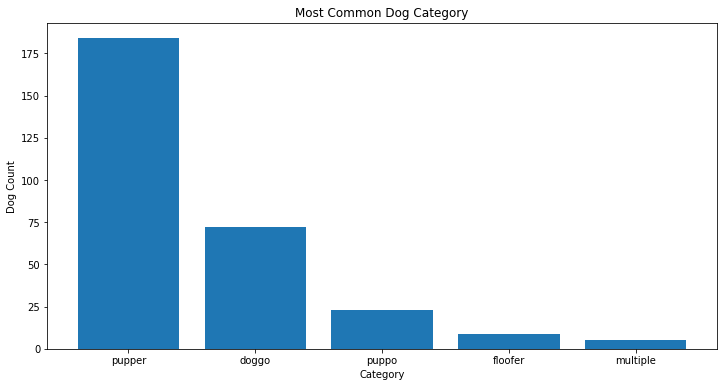

In [263]:
#most common dog category
dog_type = ['pupper', 'doggo', 'puppo', 'floofer', 'multiple']
dog_counts = [184, 72, 23, 9, 5]

fig,ax = plt.subplots(figsize = (12,6))
ax.bar(dog_type, dog_counts, width = 0.8)
ax.set_ylabel('Dog Count')
ax.set_xlabel('Category')
plt.title("Most Common Dog Category")
plt.show()

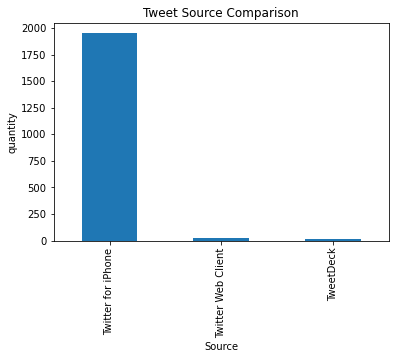

In [265]:
#tweet source comparison
twitter_df_clean['source'].value_counts().plot(kind='bar')
plt.title('Tweet Source Comparison');
plt.xlabel('Source');
plt.ylabel('quantity');

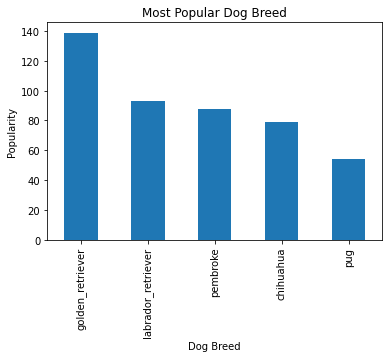

In [266]:
#most popular dog breed
twitter_df_clean['p1'].value_counts().head(5).plot(kind='bar')
plt.title('Most Popular Dog Breed');
plt.xlabel('Dog Breed');
plt.ylabel('Popularity');